In [1]:
import numpy as np
from matplotlib import pyplot
pyplot.style.use('fivethirtyeight')

In [2]:
#Monte Carlo simulation of random fluctuation between max and min and plot, modeling a uniform distribution
def random_sentencing(min, max, num_iter=10000):
    sentence_array = np.random.uniform(min, max, num_iter)
    pyplot.hist(sentence_array, bins=50)
    pyplot.xlabel('Sentence length')
    pyplot.ylabel('Frequency')
    #add marker to median
    pyplot.axvline(np.median(sentence_array), color='m', linestyle='dashed', linewidth=1)


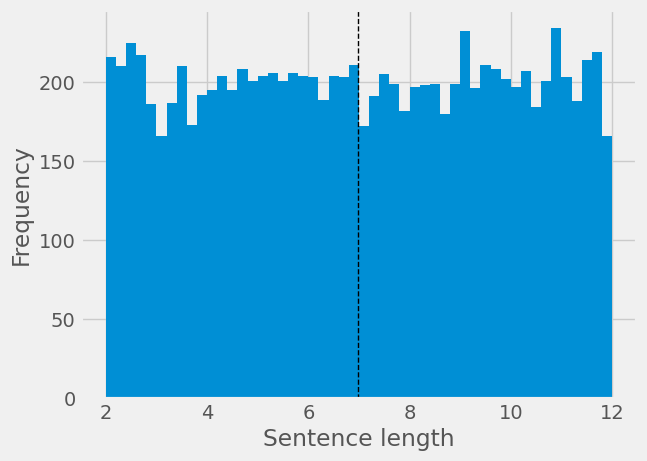

In [9]:
random_sentencing(2, 12)

In [8]:
#Monte Carlo simulation of random fluctuation between max and min and plot, modeling a beta distribution
def random_sentencing_beta(min, max, num_iter=10000, alpha=0.5, beta=2):
    sentence_array = np.random.beta(alpha, beta, num_iter) * (max - min) + min
    pyplot.hist(sentence_array, bins=50, density=True)
    pyplot.xlabel('Sentence Length')
    pyplot.ylabel('PDF')
    pyplot.axvline(np.median(sentence_array), color='m', linestyle='dashed', linewidth=1)

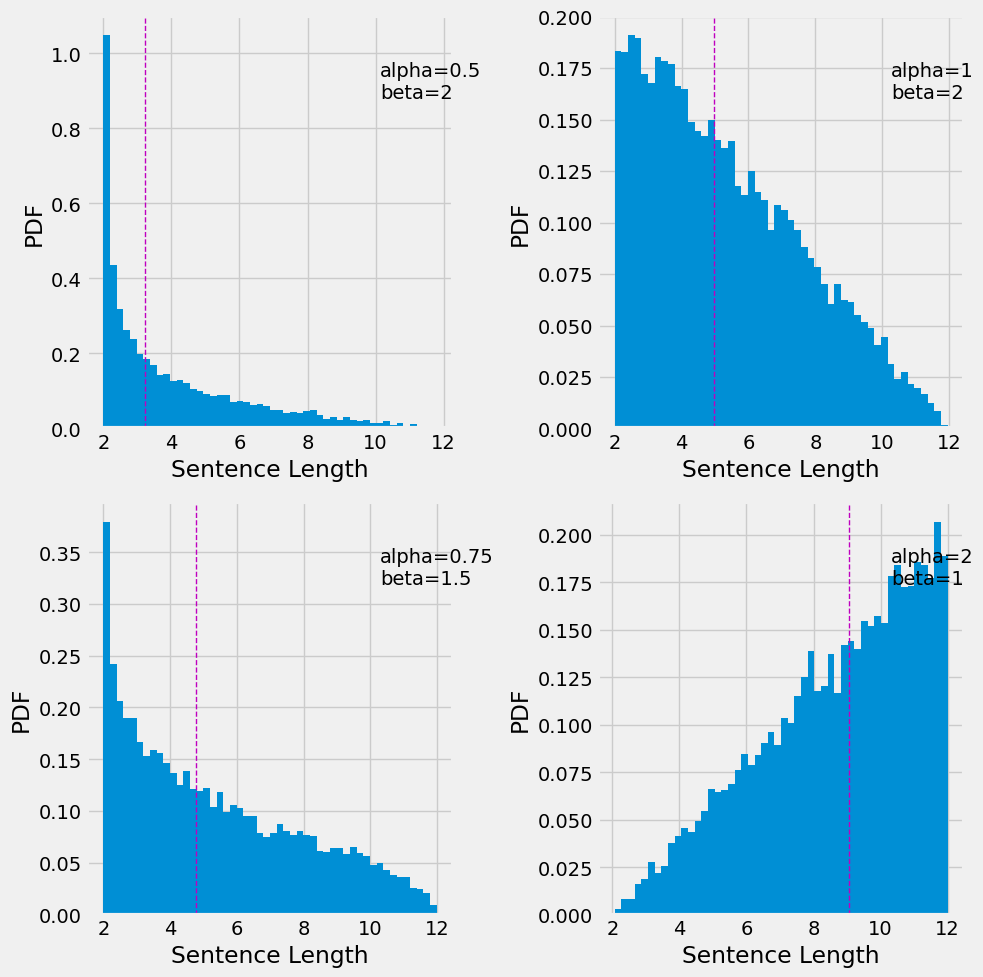

In [13]:
alpha_values = [0.5, 1, 0.75, 2]
beta_values = [2, 2, 1.5, 1]

fig, axs = pyplot.subplots(2, 2, figsize=(10, 10))

for ax, alpha, beta in zip(axs.flatten(), alpha_values, beta_values):
    pyplot.sca(ax)
    random_sentencing_beta(2, 12, alpha=alpha, beta=beta)
    pyplot.text(0.8, 0.8, f'alpha={alpha}\nbeta={beta}', transform=ax.transAxes)

pyplot.tight_layout()
pyplot.show()

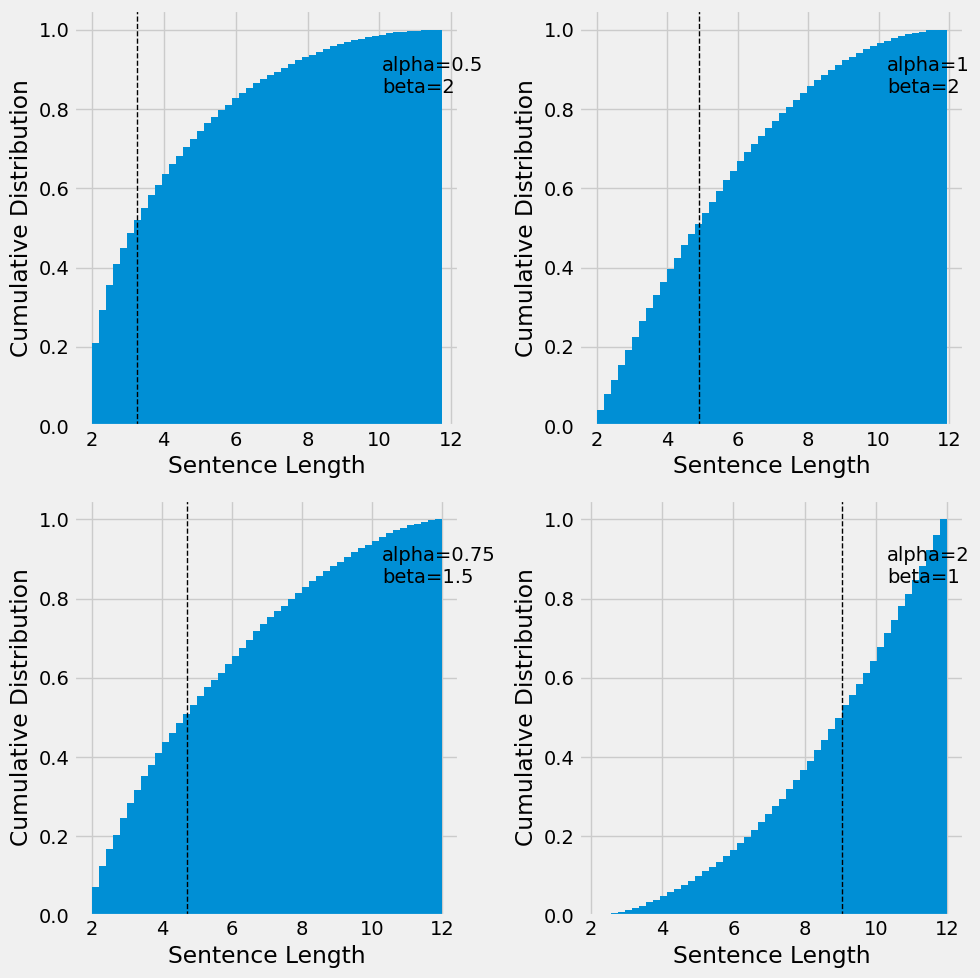

In [14]:
#Display as a CDF instead of a PDF
def random_sentencing_beta_cdf(min_val, max_val, num_iter=10000, alpha=0.5, beta=2):
    sentence_array = np.random.beta(alpha, beta, num_iter) * (max_val - min_val) + min_val
    pyplot.hist(sentence_array, bins=50, density=True, cumulative=True)
    pyplot.xlabel('Sentence Length')
    pyplot.ylabel('Cumulative Distribution')
    pyplot.axvline(np.median(sentence_array), color='k', linestyle='dashed', linewidth=1)

fig, axs = pyplot.subplots(2, 2, figsize=(10, 10))

for ax, alpha, beta in zip(axs.flatten(), alpha_values, beta_values):
    pyplot.sca(ax)
    random_sentencing_beta_cdf(2, 12, alpha=alpha, beta=beta)
    pyplot.text(0.8, 0.8, f'alpha={alpha}\nbeta={beta}', transform=ax.transAxes)

pyplot.tight_layout()
pyplot.show()

In [6]:
#Monte Carlo simulation of random fluctuation between max and min and plot, modeling a normal distribution
def random_sentencing_normal(min, max, num_iter=10000, std_factor=4):
    mean = (min + max) / 2
    std_dev = (max - min) / std_factor
    sentence_array = np.random.normal(mean, std_dev, num_iter)
    pyplot.hist(sentence_array, bins=50)
    pyplot.xlabel('Sentence length')
    pyplot.ylabel('Frequency')
    #add marker to median
    pyplot.axvline(np.median(sentence_array), color='m', linestyle='dashed', linewidth=1)

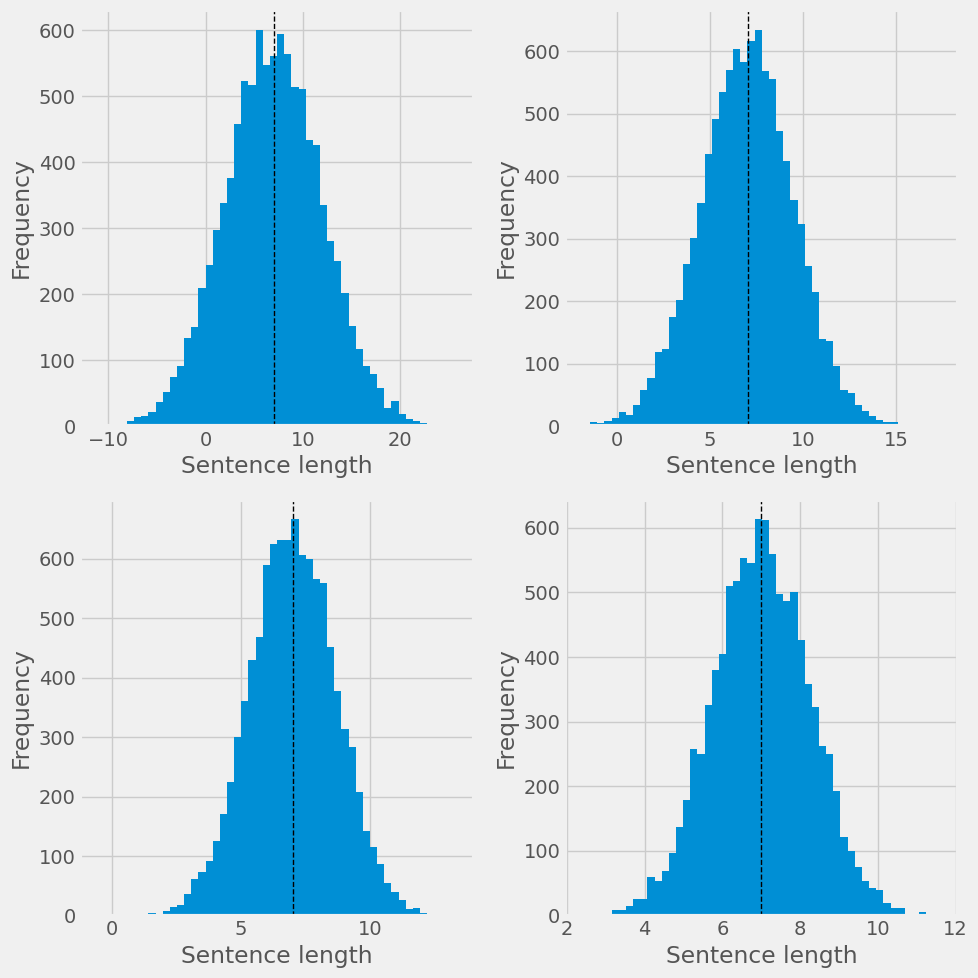

In [11]:
std_factor_list = [2, 4, 6, 8]

fig, axs = pyplot.subplots(2, 2, figsize=(10, 10))

for ax, std in zip(axs.flatten(), std_factor_list):
    pyplot.sca(ax)
    random_sentencing_normal(2, 12, std_factor=std)

pyplot.tight_layout()
pyplot.show()

## Cálculo de pena-base como uma função linear

Pena mínima acrescida da multiplicação de um vetor (8, 1) de 0 ou 1 por um vetor de (1,8) em que cada elemento é 1/8 * (P_max - P_min). O vetor 1 terá zero nas circunstâncias favoráveis e 1 nas desfavoráveis. 

### Lista de circunstâncias judciais:
1. Culpabilidade
2. Antecedentes
3. Conduta social
4. Personalidade
5. motivos [do crime]
6. circunstâncias [do crime]
7. consequências do crime
8. comportamento da vítima

*Interessante problema qualitativo:* Como dizer que o "comportamento da vítima foi "favorável" ou "desfavorável"?

Uma primeira aproximação da equação de fixação da pena-base, então, seria: 

$$ P_{base} = f(P_{min}, P_{max}, \vec{V_1}, \vec{V_2}) = P_{min} + \vec{V_1} \cdot \vec{V_2} $$

onde, $ \vec{V_1} = \begin{bmatrix} a_1 & a_2 & \cdots & a_8 \end{bmatrix}$, $\vec{V_2} = \begin{bmatrix} b \\ b \\ \vdots \\ b \end{bmatrix} $, com $a_1 \cdots a_8 \in {0, 1}$ 
e $b = \frac{1}{8} \times(P_{max} - P_{min})$


In [ ]:
#TODO: write model of weights in 8 number vector 
def model_sentencing(min, max, weights_l, circumstances=8):
    '''Create a model of sentencing based on weights and judicial circumstances
    min: minimum sentence
    max: maximum sentence
    weights_l: list of weights, one for each circumstance
    circumstances: number of judicial circumstances to consider
    returns: a sentence length based on the model
    '''
    assert len(weights_l) == circumstances, 'Number of weights must match number of circumstances'
    sentence_range = max - min
    circumstance_val = sentence_range / circumstances
    circumstance_l = []
    for weight in weights_l:
        circumstance_l.append(weight * circumstance_val)
    sentence= min + sum(circumstance_l)
    return sentence


In [ ]:
#TODO: Monte Carlo simulation of model